# Machine-learning analysis - Balanced dataset - Only TNBC - Only Hugo - p-value < 0.05

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

In [4]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data_definitivo")

In [5]:
# load the occurrence matrix 
occurrence_matrix_TNandNONTN_relgenes_p005 = pd.read_csv('Occurrence_Matrix_onlyTNrelgenes_pval005_withLabels_ONLYHUGO_definitivo.csv', sep=None, engine='python')

# Set the first column as row indices
occurrence_matrix_TNandNONTN_relgenes_p005 = occurrence_matrix_TNandNONTN_relgenes_p005.set_index(occurrence_matrix_TNandNONTN_relgenes_p005.iloc[:, 0])
# Remove the name of the index column
occurrence_matrix_TNandNONTN_relgenes_p005 = occurrence_matrix_TNandNONTN_relgenes_p005.rename_axis(None, axis='index')
# Drop the first column from the DataFrame
occurrence_matrix_TNandNONTN_relgenes_p005 = occurrence_matrix_TNandNONTN_relgenes_p005.iloc[:, 1:]

occurrence_matrix_TNandNONTN_relgenes_p005

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# SELECT THE PATIENTS

# Extract the row indices as a list
total_patient_indices = occurrence_matrix_TNandNONTN_relgenes_p005.index.tolist()
# Create a new DataFrame with the patient indices
total_patient_indices = pd.DataFrame({'Patient': total_patient_indices})
total_patient_indices

,Patient
0,brca_smc_2018_BB01_002
1,brca_smc_2018_BB01_004
2,brca_smc_2018_BB01_005
3,brca_smc_2018_BB01_006
4,brca_smc_2018_BB01_008
...,...
1399,MBCProject_xBfJfri9
1400,MBCProject_xoHAF6s8
1401,MBCProject_yZSnSluK
1402,MBCProject_ygcMFgCR


### Study the intersection between these patients and the only cluster test patients

In [7]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
# load the test patients of the encoding 'only cluster'
onlyclusters_TNandNONTN_test_pts_p005 = pd.read_csv('Test_TNandNONTNpatients_only_clusters_p_005.txt', sep=',', engine='python')
onlyclusters_TNandNONTN_test_pts_p005

,Patient
0,TCGA-B6-A401
1,TCGA-B6-A0X5
2,TCGA-A2-A0D0
3,TCGA-A2-A0CL
4,TCGA-D8-A142
...,...
65,brca_smc_2018_BR371
66,brca_smc_2018_BB01_017
67,TCGA-A7-A0DB
68,brca_smc_2018_BB01_126


In [8]:
pd.merge(total_patient_indices, onlyclusters_TNandNONTN_test_pts_p005, how='inner', on=['Patient'])

,Patient
0,brca_smc_2018_BB01_017
1,brca_smc_2018_BB01_037
2,brca_smc_2018_BB01_110
3,brca_smc_2018_BB01_119
4,brca_smc_2018_BB01_126
...,...
65,MBC_204
66,MBCProject_LVSjf8h7
67,MBCProject_d5CbUNTb
68,MBCProject_oqupfDu7


All the 70 only clusters patients are present in the dataset of interest.

In [9]:
columns_with_all_zeros = (occurrence_matrix_TNandNONTN_relgenes_p005 == 0).all().sum()
columns_with_all_zeros

0

In [10]:
(occurrence_matrix_TNandNONTN_relgenes_p005 == 0).all().sum()

0

There are no rows and no columns with all zero values.

In [11]:
# load the patients you want to keep in the test set 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
# load the test patients of the encoding 'only cluster'
hugovariant_TNandNONTN_test_pts_p005 = pd.read_csv('Test_TNandNONTNpts_hugoVariant_p005.txt', sep=',', engine='python')
hugovariant_TNandNONTN_test_pts_p005

,Patient
0,BR-M-045
1,TCGA-A2-A0YE
2,TCGA-AN-A0AL
3,MBC_132
4,TCGA-OL-A5S0
...,...
141,MBC_72
142,MBC_183
143,MBC_199
144,MBCProject_LVSjf8h7


### Study the intersection between these patients and the test patients from 1A and 2A experiments

In [12]:
pd.merge(total_patient_indices, hugovariant_TNandNONTN_test_pts_p005, how='inner', on=['Patient'])

,Patient
0,brca_smc_2018_BB01_017
1,brca_smc_2018_BB01_037
2,brca_smc_2018_BB01_110
3,brca_smc_2018_BB01_119
4,brca_smc_2018_BB01_126
...,...
137,MBCProject_LVSjf8h7
138,MBCProject_d5CbUNTb
139,MBCProject_epUYsdCE
140,MBCProject_oqupfDu7


4 patients are not present in the dataset under study.

### Check if there are patients with no features (zero rows) and mutations not present in any patient (zero columns)

In [13]:
patient_target = occurrence_matrix_TNandNONTN_relgenes_p005[['Target']]
patient_target

,Target
brca_smc_2018_BB01_002,0
brca_smc_2018_BB01_004,1
brca_smc_2018_BB01_005,0
brca_smc_2018_BB01_006,0
brca_smc_2018_BB01_008,0
...,...
MBCProject_xBfJfri9,0
MBCProject_xoHAF6s8,0
MBCProject_yZSnSluK,0
MBCProject_ygcMFgCR,0


In [14]:
occurrence_matrix_without_target = occurrence_matrix_TNandNONTN_relgenes_p005.drop('Target', axis=1)
occurrence_matrix_without_target

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,FANK1_noClust,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
zero_rows = occurrence_matrix_without_target[(occurrence_matrix_without_target == 0).all(axis=1)]
zero_rows

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,FANK1_noClust,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust


There aren't patients with zero mutations.

In [16]:
# separate the class 0 (non TN) from the class 1 (TN)

# class count
class_count_0, class_count_1 = occurrence_matrix_TNandNONTN_relgenes_p005['Target'].value_counts()

In [17]:
class_count_0

1116

In [18]:
class_count_1

288

In [19]:
# Separate class
class_0 = occurrence_matrix_TNandNONTN_relgenes_p005[occurrence_matrix_TNandNONTN_relgenes_p005['Target'] == 0]
class_1 = occurrence_matrix_TNandNONTN_relgenes_p005[occurrence_matrix_TNandNONTN_relgenes_p005['Target'] == 1] # print the shape of the class
print('Target 0 - Non TN:', class_0.shape)
print('Target 1 - TN:', class_1.shape)

Target 0 - Non TN: (1116, 389)
Target 1 - TN: (288, 389)


In [20]:
# Non Triple-Negative patients (the patients without mutations in the considered genes have been dropped out) 
class_0

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# SELECT THE PATIENTS

# Extract the row indices as a list
NONTN_patient_indices = class_0.index.tolist()
# Create a new DataFrame with the patient indices
NONTN_patient_df = pd.DataFrame({'Patient': NONTN_patient_indices})
NONTN_patient_df

,Patient
0,brca_smc_2018_BB01_002
1,brca_smc_2018_BB01_005
2,brca_smc_2018_BB01_006
3,brca_smc_2018_BB01_008
4,brca_smc_2018_BB01_009
...,...
1111,MBCProject_xBfJfri9
1112,MBCProject_xoHAF6s8
1113,MBCProject_yZSnSluK
1114,MBCProject_ygcMFgCR


### Select the patients that you do not want to discard when balancing the datasets.

In [22]:
NONTN_pts_tokeep= pd.merge(NONTN_patient_df, hugovariant_TNandNONTN_test_pts_p005, how='inner', on=['Patient'])
NONTN_pts_tokeep

,Patient
0,brca_smc_2018_BB01_017
1,brca_smc_2018_BB01_130
2,brca_smc_2018_BR170
3,brca_smc_2018_BR331
4,brca_smc_2018_BR371
...,...
64,MBCProject_27uAugT4
65,MBCProject_2kS5fYc1
66,MBCProject_7oIotZSe
67,MBCProject_LVSjf8h7


In [23]:
NONTN_pts_tokeep = NONTN_pts_tokeep[NONTN_pts_tokeep['Patient'] != 'brca_smc_2018_BB01_130']

In the test set you want at least these 72 non triple negative patients.

In [24]:
NONTN_pts_tokeep_list = NONTN_pts_tokeep['Patient'].tolist()
NONTN_pts_tokeep_list

['brca_smc_2018_BB01_017',
 'brca_smc_2018_BR170',
 'brca_smc_2018_BR331',
 'brca_smc_2018_BR371',
 'BR-V-028',
 'BR-V-051',
 'BR-M-073',
 'PD3993a',
 'X01BR015',
 'X06BR005',
 'X11BR011',
 'X11BR014',
 'X11BR040',
 'X14BR014',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0YC',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A7-A6VX',
 'TCGA-A8-A08P',
 'TCGA-A8-A093',
 'TCGA-A8-A09M',
 'TCGA-AC-A23E',
 'TCGA-AN-A0XS',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A0TT',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO',
 'TCGA-BH-A0BZ',
 'TCGA-BH-A0H3',
 'TCGA-BH-A18F',
 'TCGA-BH-A18K',
 'TCGA-BH-A18N',
 'TCGA-BH-A18R',
 'TCGA-BH-A1FG',
 'TCGA-BH-A1FU',
 'TCGA-C8-A12U',
 'TCGA-C8-A26V',
 'TCGA-D8-A1JJ',
 'TCGA-D8-A27K',
 'TCGA-E2-A14V',
 'TCGA-E9-A1R0',
 'TCGA-E9-A1RE',
 'TCGA-EW-A1PD',
 'TCGA-GM-A2DN',
 'TCGA-OL-A5RU',
 'MBC_110',
 'MBC_128',
 'MBC_159',
 'MBC_178',
 'MBC_72',
 'M

### Select the occurrence matrix associated to these NON TN patients 

In [25]:
NONTN_occ_matrix = class_0.reset_index(inplace=False)  # Reset the index, which adds the index as a column
# Rename the new index column (which has the default name 'index') to something else if needed
NONTN_occ_matrix=NONTN_occ_matrix.rename(columns={'index': 'Patient'}, inplace=False)
NONTN_occ_matrix

,Patient,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,...,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1112,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1113,MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1114,MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
### extract the 72 NON TN patients 
NONTN_patients_tokeep_occ_matrix = pd.merge(NONTN_occ_matrix, NONTN_pts_tokeep, how='inner', on=['Patient'])
NONTN_patients_tokeep_occ_matrix

,Patient,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,...,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust,Target
0,brca_smc_2018_BB01_017,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BR170,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BR331,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BR371,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BR-V-028,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,MBCProject_27uAugT4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,MBCProject_2kS5fYc1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
65,MBCProject_7oIotZSe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# since 4 patients are missing because thet do not intersect, pick up randomly 4 pts from the non tn dataset
patients_to_select = ['MBCProject_ygcMFgCR', 'MBCProject_xoHAF6s8', 'brca_smc_2018_BB01_005', 'brca_smc_2018_BB01_009']
selected_rows = NONTN_occ_matrix[NONTN_occ_matrix['Patient'].isin(patients_to_select)]
selected_rows

,Patient,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,...,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust,Target
1,brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1112,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1114,MBCProject_ygcMFgCR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
NONTN_patients_tokeep_occ_matrix2 = pd.concat([NONTN_patients_tokeep_occ_matrix, selected_rows], axis=0)
NONTN_patients_tokeep_occ_matrix2

,Patient,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,...,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust,Target
0,brca_smc_2018_BB01_017,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BR170,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BR331,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BR371,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BR-V-028,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1112,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
NONTN_patients_tokeep_occ_matrix2 = NONTN_patients_tokeep_occ_matrix2.set_index('Patient', inplace=False)
NONTN_patients_tokeep_occ_matrix2.index.name = None
NONTN_patients_tokeep_occ_matrix2

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust,Target
brca_smc_2018_BB01_017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR331,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR371,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BR-V-028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
NONTN_pts_to_keep_list2 = NONTN_patients_tokeep_occ_matrix2.index.to_list()
NONTN_pts_to_keep_list2

['brca_smc_2018_BB01_017',
 'brca_smc_2018_BR170',
 'brca_smc_2018_BR331',
 'brca_smc_2018_BR371',
 'BR-V-028',
 'BR-V-051',
 'BR-M-073',
 'PD3993a',
 'X01BR015',
 'X06BR005',
 'X11BR011',
 'X11BR014',
 'X11BR040',
 'X14BR014',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0YC',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A7-A6VX',
 'TCGA-A8-A08P',
 'TCGA-A8-A093',
 'TCGA-A8-A09M',
 'TCGA-AC-A23E',
 'TCGA-AN-A0XS',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A0TT',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO',
 'TCGA-BH-A0BZ',
 'TCGA-BH-A0H3',
 'TCGA-BH-A18F',
 'TCGA-BH-A18K',
 'TCGA-BH-A18N',
 'TCGA-BH-A18R',
 'TCGA-BH-A1FG',
 'TCGA-BH-A1FU',
 'TCGA-C8-A12U',
 'TCGA-C8-A26V',
 'TCGA-D8-A1JJ',
 'TCGA-D8-A27K',
 'TCGA-E2-A14V',
 'TCGA-E9-A1R0',
 'TCGA-E9-A1RE',
 'TCGA-EW-A1PD',
 'TCGA-GM-A2DN',
 'TCGA-OL-A5RU',
 'MBC_110',
 'MBC_128',
 'MBC_159',
 'MBC_178',
 'MBC_72',
 'M

In [31]:
NONTN_patients_tokeep_occ_matrix2.sum(axis=1)

brca_smc_2018_BB01_017    2
brca_smc_2018_BR170       2
brca_smc_2018_BR331       2
brca_smc_2018_BR371       3
BR-V-028                  1
                         ..
MBCProject_pktAIxFb       5
brca_smc_2018_BB01_005    3
brca_smc_2018_BB01_009    3
MBCProject_xoHAF6s8       5
MBCProject_ygcMFgCR       7
Length: 72, dtype: int64

### Create the NON TN occurrence matrix without the 72 patients to keep

In [32]:
class_0_new = NONTN_occ_matrix[~NONTN_occ_matrix['Patient'].isin(NONTN_pts_to_keep_list2)]
class_0_new

,Patient,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,...,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,brca_smc_2018_BB01_010,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,brca_smc_2018_BB01_012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1110,MBCProject_wAiri7fp,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1111,MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1113,MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Triple-Negative patients 
class_1

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust,Target
brca_smc_2018_BB01_004,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_lQtMtjFR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
# SELECT THE PATIENTS

# Extract the row indices as a list
TN_patient_indices = class_1.index.tolist()
# Create a new DataFrame with the patient indices
TN_patient_df = pd.DataFrame({'Patient': TN_patient_indices})
TN_patient_df

,Patient
0,brca_smc_2018_BB01_004
1,brca_smc_2018_BB01_022
2,brca_smc_2018_BB01_026
3,brca_smc_2018_BB01_035
4,brca_smc_2018_BB01_037
...,...
283,MBCProject_lQtMtjFR
284,MBCProject_oqupfDu7
285,MBCProject_pMcWcrtZ
286,MBCProject_rJHBiKTl


In [35]:
TN_patient_df = TN_patient_df[TN_patient_df['Patient'] != 'brca_smc_2018_BB01_110']
TN_patient_df

,Patient
0,brca_smc_2018_BB01_004
1,brca_smc_2018_BB01_022
2,brca_smc_2018_BB01_026
3,brca_smc_2018_BB01_035
4,brca_smc_2018_BB01_037
...,...
283,MBCProject_lQtMtjFR
284,MBCProject_oqupfDu7
285,MBCProject_pMcWcrtZ
286,MBCProject_rJHBiKTl


In [36]:
TN_pts_tokeep= pd.merge(TN_patient_df, hugovariant_TNandNONTN_test_pts_p005, how='inner', on=['Patient'])
TN_pts_tokeep

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_119
2,brca_smc_2018_BB01_126
3,brca_smc_2018_BR097
4,brca_smc_2018_BR105
...,...
67,MBC_205
68,MBC_215
69,MBCProject_d5CbUNTb
70,MBCProject_epUYsdCE


In [37]:
TN_pts_tokeep_list = TN_pts_tokeep['Patient'].tolist()
TN_pts_tokeep_list

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_119',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_26',
 'MBC_31',


In [38]:
total_pts_to_keep = TN_pts_tokeep_list + NONTN_pts_to_keep_list2
total_pts_to_keep

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_119',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_26',
 'MBC_31',


In [39]:
len(total_pts_to_keep)

144

##  Guided Under-Sampling to balance the two classes

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out. But a drawback to undersampling is that we are removing information that may be valuable.

In [40]:
# Extract randomly 215 patients. (216+72)
class_0_under = class_0_new.sample(216, random_state=123) # used for random sampling 
class_0_under.set_index('Patient', inplace=True)
class_0_under.index.name = None
class_0_under

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust,Target
TCGA-WT-AB41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A1JF,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-EW-A6S9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A130,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-A2-A1FX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_eEtEC7IB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E9-A1R2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED = pd.concat([class_0_under, class_1, NONTN_patients_tokeep_occ_matrix2], axis=0)
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust,Target
TCGA-WT-AB41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A1JF,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-EW-A6S9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A130,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


total class of 1 and0: Target
0    288
1    288
Name: count, dtype: int64


<Axes: title={'center': 'Count (target) - Balanced dataset - Total TN and non TN genes'}, xlabel='Target'>

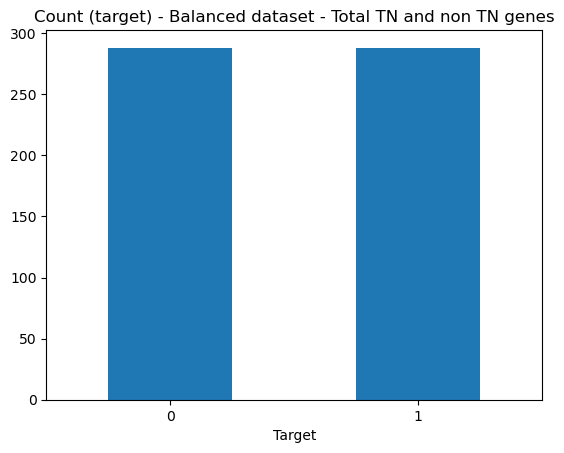

In [42]:
print("total class of 1 and0:",occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target'].value_counts())# plot the count after under-sampling
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target'].value_counts().plot(kind='bar', title='Count (target) - Balanced dataset - Total TN and non TN genes', rot=360)

In [43]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust,Target
TCGA-WT-AB41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A1JF,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-EW-A6S9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A130,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.sum(axis=0)

TP53_270_282       46
PIK3R1_566_578      5
PIK3CA_102_113     13
PIK3CA_345_345     15
PIK3CA_541_542     20
                 ... 
LSM2_noClust        1
HCRT_noClust        1
CCNT2_noClust       1
CSN2_noClust        1
Target            288
Length: 389, dtype: int64

In [45]:
# check if there are zero rows
(occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop('Target', axis=1) == 0).all(axis=1).any()

False

There are not zero rows not considering the Target column: all patients have a mutation in at least one significant gene.

In [46]:
columns_with_all_zero = (occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED == 0).all()
columns_with_all_zero

TP53_270_282      False
PIK3R1_566_578    False
PIK3CA_102_113    False
PIK3CA_345_345    False
PIK3CA_541_542    False
                  ...  
LSM2_noClust      False
HCRT_noClust      False
CCNT2_noClust     False
CSN2_noClust      False
Target            False
Length: 389, dtype: bool

In [47]:
# check if there are zero columns
(occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED == 0).all().sum()

0

There are 0 columns containing all zero values.

In [48]:
columns_to_drop = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.columns[occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.eq(0).all()]
columns_to_drop

Index([], dtype='object')

In [49]:
# drop from the dataframe the columns containing all zeros
#occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop(columns_to_drop, axis=1)
#occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

In [50]:
# save the BALANCED dataset
#os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data")
#occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.to_csv('Occurrence_Matrix_TNandNONTNrelgenes_pval005_withLabels_BALANCED_onlyHugo.txt', index=True, sep='\t')

# Preparation of training and test set and range normalization

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap

### Manually split the data in training set and test set 

In [52]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust,Target
TCGA-WT-AB41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A1JF,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-EW-A6S9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A130,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# remove the Target column to the occurrence matrix
X = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop('Target', axis=1)
X 

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,FANK1_noClust,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust
TCGA-WT-AB41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A1JF,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-EW-A6S9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A130,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# sum each column
X.sum(axis=0)

TP53_270_282       46
PIK3R1_566_578      5
PIK3CA_102_113     13
PIK3CA_345_345     15
PIK3CA_541_542     20
                   ..
PSTPIP2_noClust     1
LSM2_noClust        1
HCRT_noClust        1
CCNT2_noClust       1
CSN2_noClust        1
Length: 388, dtype: int64

In [55]:
# select and store the Target column
y = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target']
y

TCGA-WT-AB41              0
brca_smc_2018_BB01_131    0
TCGA-D8-A1JF              0
TCGA-EW-A6S9              0
TCGA-C8-A130              0
                         ..
MBCProject_pktAIxFb       0
brca_smc_2018_BB01_005    0
brca_smc_2018_BB01_009    0
MBCProject_xoHAF6s8       0
MBCProject_ygcMFgCR       0
Name: Target, Length: 576, dtype: int64

In [56]:
# consider the balanced occurrence matrix without the pts I want to keep
total_training_pts_occ_matrix_balanced = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED[~occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.index.isin(total_pts_to_keep)]
total_training_pts_occ_matrix_balanced

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust,Target
TCGA-WT-AB41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A1JF,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-EW-A6S9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A130,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
y_train = total_training_pts_occ_matrix_balanced['Target']
y_train

TCGA-WT-AB41              0
brca_smc_2018_BB01_131    0
TCGA-D8-A1JF              0
TCGA-EW-A6S9              0
TCGA-C8-A130              0
                         ..
MBCProject_QJFdf8hQ       1
MBCProject_lQtMtjFR       1
MBCProject_pMcWcrtZ       1
MBCProject_rJHBiKTl       1
MBCProject_wzCxuoio       1
Name: Target, Length: 432, dtype: int64

In [58]:
X_train = total_training_pts_occ_matrix_balanced.drop('Target', axis=1)
X_train

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,FANK1_noClust,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust
TCGA-WT-AB41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A1JF,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-EW-A6S9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A130,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
MBCProject_lQtMtjFR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
print("total class of 1 and 0:",total_training_pts_occ_matrix_balanced['Target'].value_counts())

total class of 1 and 0: Target
0    216
1    216
Name: count, dtype: int64


In [60]:
training_pts_list = total_training_pts_occ_matrix_balanced.index.tolist()
training_pts_list

['TCGA-WT-AB41',
 'brca_smc_2018_BB01_131',
 'TCGA-D8-A1JF',
 'TCGA-EW-A6S9',
 'TCGA-C8-A130',
 'TCGA-AO-A0JD',
 'TCGA-C8-A26W',
 'brca_smc_2018_BB01_028',
 'TCGA-AN-A0FY',
 'PD4939a',
 'brca_smc_2018_BR414',
 'MBCProject_70CxiQFk',
 'X11BR043',
 'X05BR038',
 'MBC_151',
 'MBC_74',
 'TCGA-BH-A0DD',
 'MBC_75',
 'TCGA-A2-A04V',
 'MBCProject_bvHXCoTY',
 'TCGA-A2-A04X',
 'MBCProject_zyt5TKFB',
 'MBC_7',
 'MBC_209',
 'PD4070a',
 'PD3985a',
 'MBCProject_9RtxtGUO',
 'MBC_90',
 'TCGA-A7-A56D',
 'X15BR003',
 'MBCProject_LDCbC8t9',
 'TCGA-E9-A1R7',
 'BR-V-064',
 'MBC_130',
 'PD4111a',
 'TCGA-E2-A14O',
 'TCGA-BH-A0HB',
 'BR-M-123',
 'X11BR015',
 'TCGA-A2-A259',
 'MBCProject_LPHKFauY',
 'MBC_13',
 'MBC_139',
 'brca_smc_2018_BR064',
 'MBC_180',
 'MBCProject_lGCMIGT0',
 'TCGA-A8-A09C',
 'TCGA-BH-A202',
 'TCGA-A8-A07Z',
 'X11BR032',
 'BR-M-165',
 'TCGA-D8-A1XA',
 'PD4132a',
 'TCGA-E9-A1RA',
 'X09BR004',
 'MBCProject_mMhdcrh5',
 'TCGA-BH-A0HN',
 'BR-M-041',
 'brca_smc_2018_BR442',
 'BR-M-048',
 'MBCPro

In [61]:
# Create a new DataFrame with the patient indices
training_pts_df = pd.DataFrame({'Patient': training_pts_list})
training_pts_df

,Patient
0,TCGA-WT-AB41
1,brca_smc_2018_BB01_131
2,TCGA-D8-A1JF
3,TCGA-EW-A6S9
4,TCGA-C8-A130
...,...
427,MBCProject_QJFdf8hQ
428,MBCProject_lQtMtjFR
429,MBCProject_pMcWcrtZ
430,MBCProject_rJHBiKTl


In [62]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Training_patients")
# save the training patients 
training_pts_df.to_csv('Training_onlyTN_onlyhugo_p005.txt', index=False, sep='\t')

In [63]:
# consider the balanced occurrence matrix with the pts I want to keep
total_test_pts_occ_matrix_balanced = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED[occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.index.isin(total_pts_to_keep)]
total_test_pts_occ_matrix_balanced

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust,Target
brca_smc_2018_BB01_037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BR097,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BR105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y_test = total_test_pts_occ_matrix_balanced['Target']
y_test

brca_smc_2018_BB01_037    1
brca_smc_2018_BB01_119    1
brca_smc_2018_BB01_126    1
brca_smc_2018_BR097       1
brca_smc_2018_BR105       1
                         ..
MBCProject_pktAIxFb       0
brca_smc_2018_BB01_005    0
brca_smc_2018_BB01_009    0
MBCProject_xoHAF6s8       0
MBCProject_ygcMFgCR       0
Name: Target, Length: 144, dtype: int64

In [65]:
X_test = total_test_pts_occ_matrix_balanced.drop('Target', axis=1)
X_test

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,FANK1_noClust,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust
brca_smc_2018_BB01_037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR097,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
test_pts_list = total_test_pts_occ_matrix_balanced.index.tolist()
test_pts_list

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_119',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_26',
 'MBC_31',


In [67]:
X_train.columns[(X_train == 0).all(axis=0)]

Index(['GLS_noClust', 'VPS9D1_noClust', 'MRPS7_noClust', 'CCDC126_noClust',
       'CCNT2_noClust', 'CSN2_noClust'],
      dtype='object')

In [68]:
len(X_train.columns[(X_train == 0).all(axis=0)])

6

There are 6 columns in the training dataset with just 0 values. 

In [69]:
X_test

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,FANK1_noClust,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust
brca_smc_2018_BB01_037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR097,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
X_test.columns[(X_test == 0).all(axis=0)]

Index(['MYL10_26_26', 'ZNF195_109_111', 'CTCF_283_288', 'STAT1_noClust',
       'EPS8L3_noClust', 'CALB2_noClust', 'TFPI2_noClust', 'CRABP1_noClust',
       'UBE3B_noClust', 'ATG14_noClust',
       ...
       'GRAMD1C_noClust', 'TRIM6_noClust', 'NAA50_noClust', 'LDOC1L_noClust',
       'G3BP1_noClust', 'NAGK_noClust', 'FAM153A_noClust', 'PSTPIP2_noClust',
       'LSM2_noClust', 'HCRT_noClust'],
      dtype='object', length=101)

In [71]:
len(X_test.columns[(X_test == 0).all(axis=0)])

101

There are 101 columns in the test dataset with just zero values.

In [72]:
y_train.value_counts()

Target
0    216
1    216
Name: count, dtype: int64

In [73]:
y_test.value_counts()

Target
1    72
0    72
Name: count, dtype: int64

In [74]:
# range-normalization on the training set 
def range_norm_training(x):
    return (x - x.min()) / (x.max() - x.min())

In [75]:
# apply this normalization column-wise to the training 
normalized_X_train = X_train.apply(range_norm_training, axis=0)
normalized_X_train

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,FANK1_noClust,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust
TCGA-WT-AB41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
brca_smc_2018_BB01_131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
TCGA-D8-A1JF,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
TCGA-EW-A6S9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
TCGA-C8-A130,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_QJFdf8hQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
MBCProject_lQtMtjFR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
MBCProject_pMcWcrtZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
MBCProject_rJHBiKTl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [76]:
# check the columns containing just Nan Values 
normalized_X_train.isna().all(axis=0).sum()

6

6 columns contain NaN values, that are the columns with all zero values in the training set.

In [77]:
np.isinf(normalized_X_train).any().any()

False

In [78]:
# replace the NaN values with zero 
normalized_X_train = normalized_X_train.fillna(0)
normalized_X_train

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,FANK1_noClust,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust
TCGA-WT-AB41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-D8-A1JF,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-EW-A6S9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-C8-A130,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_QJFdf8hQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_lQtMtjFR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_pMcWcrtZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_rJHBiKTl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
normalized_X_train.isna().any().any()

False

In [80]:
normalized_X_train.sum(axis=0)

TP53_270_282       17.5
PIK3R1_566_578      2.0
PIK3CA_102_113     10.0
PIK3CA_345_345      7.0
PIK3CA_541_542      5.0
                   ... 
PSTPIP2_noClust     1.0
LSM2_noClust        1.0
HCRT_noClust        1.0
CCNT2_noClust       0.0
CSN2_noClust        0.0
Length: 388, dtype: float64

In [81]:
normalized_X_train.sum(axis=0).sum()

1805.5833333333335

In [82]:
# define a function to perform range normalization on the test set based on the values of the training set 
def range_norm_test(train_set, test_set):
    #compute the minimum and the maximum values for each column in the training 
    min_value = train_set.min(axis=0)
    max_value = train_set.max(axis=0)
    # Apply range normalization to the test set based on the min and the max of the training set 
    normalized_test_set = (test_set - min_value) / (max_value - min_value)
    
    return normalized_test_set

# NOTE: it is not necessary to check if the minimum of the test is > than the minimum of the training, since the minimum values in each column both for the test and for the training are zeros

In [83]:
normalized_X_test = range_norm_test(X_train, X_test)
normalized_X_test

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,FANK1_noClust,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust
brca_smc_2018_BB01_037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
brca_smc_2018_BB01_119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
brca_smc_2018_BB01_126,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
brca_smc_2018_BR097,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
brca_smc_2018_BR105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
brca_smc_2018_BB01_005,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
brca_smc_2018_BB01_009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
MBCProject_xoHAF6s8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [84]:
np.isinf(normalized_X_test).any().any()

True

In [85]:
# check the columns containing just Nan Values 
normalized_X_test.isna().all(axis=0).sum()

0

In [86]:
# check how many columns contain all infinite values 
np.isinf(normalized_X_test).any().sum()

6

6 as the number of zero columns in the training set 

In [87]:
# replace the Infinite values with zero 
normalized_X_test = normalized_X_test.replace([np.inf, -np.inf], 0)
normalized_X_test

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,FANK1_noClust,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust
brca_smc_2018_BB01_037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
brca_smc_2018_BB01_119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
brca_smc_2018_BB01_126,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
brca_smc_2018_BR097,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
brca_smc_2018_BR105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
brca_smc_2018_BB01_005,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
brca_smc_2018_BB01_009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
MBCProject_xoHAF6s8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [88]:
# replace the NaN values with zero 
normalized_X_test = normalized_X_test.fillna(0)
normalized_X_test

,TP53_270_282,PIK3R1_566_578,PIK3CA_102_113,PIK3CA_345_345,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,MAML3_503_503,ZKSCAN1_270_270,MTMR12_520_521,...,FANK1_noClust,G3BP1_noClust,NAGK_noClust,FAM153A_noClust,SNAP23_noClust,PSTPIP2_noClust,LSM2_noClust,HCRT_noClust,CCNT2_noClust,CSN2_noClust
brca_smc_2018_BB01_037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_126,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR097,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_005,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_xoHAF6s8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
np.isinf(normalized_X_test).any().sum()

0

In [90]:
normalized_X_test.isnull().all(axis=0).sum()

0

### Select the test patients 


In [91]:
# Extract the row indices as a list
test_patient_indices = normalized_X_test.index.tolist()
test_patient_indices

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_119',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_26',
 'MBC_31',


In [92]:
# Create a new DataFrame with the patient indices
test_patient_df = pd.DataFrame({'Patient': test_patient_indices})
test_patient_df

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_119
2,brca_smc_2018_BB01_126
3,brca_smc_2018_BR097
4,brca_smc_2018_BR105
...,...
139,MBCProject_pktAIxFb
140,brca_smc_2018_BB01_005
141,brca_smc_2018_BB01_009
142,MBCProject_xoHAF6s8


In [93]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
test_patient_df.to_csv('Test_onlyTN_onlyHugo_p005.txt', index=False, sep='\t')

### Study the overlapping between the test patients of 'only cluster' encoding and the test patients of the current encoding

In [94]:
pd.merge(test_patient_df, onlyclusters_TNandNONTN_test_pts_p005, how='inner', on=['Patient'])

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_119
2,brca_smc_2018_BB01_126
3,brca_smc_2018_BR145
4,PD4133a
...,...
63,MBC_72
64,MBC_183
65,MBC_199
66,MBCProject_LVSjf8h7


In [95]:
pd.merge(test_patient_df, hugovariant_TNandNONTN_test_pts_p005, how='inner', on=['Patient'])

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_119
2,brca_smc_2018_BB01_126
3,brca_smc_2018_BR097
4,brca_smc_2018_BR105
...,...
135,MBCProject_27uAugT4
136,MBCProject_2kS5fYc1
137,MBCProject_7oIotZSe
138,MBCProject_LVSjf8h7


### Extracting the features

In [96]:
tot_features = normalized_X_train.columns.tolist()
tot_features

['TP53_270_282',
 'PIK3R1_566_578',
 'PIK3CA_102_113',
 'PIK3CA_345_345',
 'PIK3CA_541_542',
 'PIK3CA_545_546',
 'PIK3CA_1046_1047',
 'MAML3_503_503',
 'ZKSCAN1_270_270',
 'MTMR12_520_521',
 'USP8_523_523',
 'AKT1_17_17',
 'MYL10_26_26',
 'ZNF195_109_111',
 'TP53_191_199',
 'TP53_236_258',
 'TP53_173_177',
 'CTCF_283_288',
 'NOTCH2_2297_2303',
 'TMPRSS13_77_83',
 'PIK3CA_418_420',
 'TP53_noClust',
 'PIK3CA_noClust',
 'MAML3_noClust',
 'COL6A6_noClust',
 'ATP11A_noClust',
 'STAT1_noClust',
 'CDC20_noClust',
 'MMS22L_noClust',
 'KMT2C_noClust',
 'PTEN_noClust',
 'KCNH6_noClust',
 'KRTAP24-1_noClust',
 'ARID1A_noClust',
 'MUC4_noClust',
 'NOTCH2_noClust',
 'CCNE2_noClust',
 'MYH7B_noClust',
 'TNRC6C_noClust',
 'TULP4_noClust',
 'ARHGAP5_noClust',
 'SERPINB3_noClust',
 'CACNA1S_noClust',
 'ACTN4_noClust',
 'PUM1_noClust',
 'LARP4B_noClust',
 'SMTNL1_noClust',
 'MTRF1_noClust',
 'CTCF_noClust',
 'SVIL_noClust',
 'NPAS4_noClust',
 'NAV3_noClust',
 'EPS8L3_noClust',
 'ZNF438_noClust',
 'CALB2

In [97]:
# Convert the list into a dataframe 
tot_features_df = pd.DataFrame({'Features': tot_features})
tot_features_df

,Features
0,TP53_270_282
1,PIK3R1_566_578
2,PIK3CA_102_113
3,PIK3CA_345_345
4,PIK3CA_541_542
...,...
383,PSTPIP2_noClust
384,LSM2_noClust
385,HCRT_noClust
386,CCNT2_noClust


#### Extract only the Hugo Symbol from the features 

In [98]:
tot_features_df['Hugo_Symbol'] = tot_features_df['Features'].str.split('_').str[0]
tot_features_df

,Features,Hugo_Symbol
0,TP53_270_282,TP53
1,PIK3R1_566_578,PIK3R1
2,PIK3CA_102_113,PIK3CA
3,PIK3CA_345_345,PIK3CA
4,PIK3CA_541_542,PIK3CA
...,...,...
383,PSTPIP2_noClust,PSTPIP2
384,LSM2_noClust,LSM2
385,HCRT_noClust,HCRT
386,CCNT2_noClust,CCNT2


In [99]:
tot_features_df_onlyHugo = tot_features_df[['Hugo_Symbol']]
tot_features_df_onlyHugo

,Hugo_Symbol
0,TP53
1,PIK3R1
2,PIK3CA
3,PIK3CA
4,PIK3CA
...,...
383,PSTPIP2
384,LSM2
385,HCRT
386,CCNT2


In [100]:
tot_features_df_onlyHugo.duplicated().sum()

21

In [101]:
# consider just unique genes - drop duplicates 
tot_features_df_onlyHugo_nodup = tot_features_df_onlyHugo.drop_duplicates()
tot_features_df_onlyHugo_nodup

,Hugo_Symbol
0,TP53
1,PIK3R1
2,PIK3CA
7,MAML3
8,ZKSCAN1
...,...
383,PSTPIP2
384,LSM2
385,HCRT
386,CCNT2


In [102]:
tot_features_df_onlyHugo_nodup.shape

(367, 1)

### Intersection with GERSOM genes

In [103]:
# load the GERSOM list
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi")
gersom_genes = pd.read_csv('lista Gersom.csv', sep=None, engine='python')
gersom_genes

,﻿Hugo_symbol,Gene_type
0,ABCB11,Ereditario
1,ABL1,Drivers
2,ABL2,Actionable
3,ACVR1,Drivers
4,ACVR1B,Drivers
...,...,...
462,ZFP36L2,Drivers
463,ZMYM2,Drivers
464,ZMYM3,Drivers
465,ZNF133,Drivers


In [104]:
gersom_genes.rename(columns={'﻿Hugo_symbol': 'Hugo_Symbol'}, inplace=True)
gersom_genes[['Hugo_Symbol']]

,Hugo_Symbol
0,ABCB11
1,ABL1
2,ABL2
3,ACVR1
4,ACVR1B
...,...
462,ZFP36L2
463,ZMYM2
464,ZMYM3
465,ZNF133


In [105]:
# GERSOM + 1B genes
pd.merge(tot_features_df_onlyHugo_nodup, gersom_genes, how='inner', on=['Hugo_Symbol'])

,Hugo_Symbol,Gene_type
0,TP53,Drivers_Ereditario
1,PIK3R1,Drivers
2,PIK3CA,Drivers_Ereditario
3,AKT1,Drivers_Ereditario
4,CTCF,Drivers
5,NOTCH2,Drivers
6,KMT2C,Driver
7,PTEN,Drivers_Ereditario
8,ARID1A,Drivers
9,ATRX,Drivers


## Grid search to find the optimal C parameter for Lasso regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best lambda (alpha) for Lasso logistic regression:  0.38852361028093246
Best cross-validation score:  0.6712910986367282


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results')

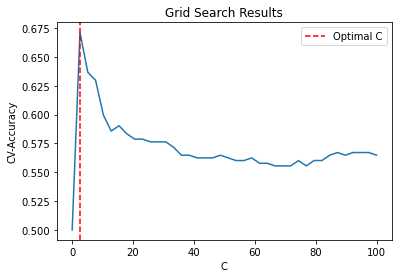

In [144]:
# The code performs a grid search with cross-validation (10-fold) to find the optimal value of the 'C' parameter in Lasso logistic regression. 
# It tries different values of 'C' specified in param_grid and evaluates the model's performance using 10-fold cross-validation. The result is stored in the grid_search object, which can be accessed to retrieve the best hyperparameters and evaluate the model's performance.

param_grid = {'C': np.linspace(0.01, 100, 40)}
# Create a logistic regression model with Lasso regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear') # if I add max_iter=int(1e6), it blocks

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best lambda (alpha) value
print("Best lambda (alpha) for Lasso logistic regression: ", 1 / grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]


plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results')
plt.legend()
plt.show()

Best lambda (alpha) for Lasso logistic regression:  0.38852361028093246 (C=2.57).

In [145]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# After fitting the grid search, calculate metrics using cross_val_predict
best_lasso_model = grid_search.best_estimator_  # Get the best Lasso model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred = cross_val_predict(best_lasso_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision_1 = np.mean(precision_scores_1)
std_precision_1 = np.std(precision_scores_1)
mean_recall_1 = np.mean(recall_scores_1)
std_recall_1 = np.std(recall_scores_1)
mean_f1_1 = np.mean(f1_scores_1)
std_f1_1 = np.std(f1_scores_1)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print("Mean Cross-Validation Precision - 1:", mean_precision_1)
print("Standard Deviation of Precision - 1:", std_precision_1)
print("Mean Cross-Validation Recall - 1:", mean_recall_1)
print("Standard Deviation of Recall - 1:", std_recall_1)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1)
print("Standard Deviation of F1-score - 1:", std_f1_1)

Mean Cross-Validation Accuracy: 0.6712910986367282
Standard Deviation of Accuracy: 0.050050747443637786
Mean Cross-Validation Precision - 1: 0.6823202527309404
Standard Deviation of Precision - 1: 0.027696577899488196
Mean Cross-Validation Recall - 1: 0.6339323467230444
Standard Deviation of Recall - 1: 0.14579907203661352
Mean Cross-Validation F1-score - 1: 0.6488912320929694
Standard Deviation of F1-score - 1: 0.09584812021006636


In [146]:
precision_scores_1 

array([0.64102564, 0.72093023, 0.68085106, 0.70212766, 0.66666667])

#### Compute the mean and the standard deviation cross-validation precision, recall and F1-score for the negative class 0

In [147]:
from sklearn.metrics import make_scorer
# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0 = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0 = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0 = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0)

# compute the mean and the standard deviation
mean_precision_0 = np.mean(precision_scores_0)
std_precision_0 = np.std(precision_scores_0)
mean_recall_0 = np.mean(recall_scores_0)
std_recall_0 = np.std(recall_scores_0)
mean_f1_0 = np.mean(f1_scores_0)
std_f1_0 = np.std(f1_scores_0)

print("Mean Cross-Validation Precision - 0:", mean_precision_0)
print("Standard Deviation of Precision - 0:", std_precision_0)
print("Mean Cross-Validation Recall - 0:", mean_recall_0)
print("Standard Deviation of Recall - 0:", std_recall_0)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0)
print("Standard Deviation of F1-score: - 0", std_f1_0)

Mean Cross-Validation Precision - 0: 0.6711200090232349
Standard Deviation of Precision - 0: 0.06641309099501477
Mean Cross-Validation Recall - 0: 0.7084566596194503
Standard Deviation of Recall - 0: 0.05733403177928392
Mean Cross-Validation F1-score: - 0 0.6843456320620179
Standard Deviation of F1-score: - 0 0.023143227273014644


In [148]:
precision_scores_0

array([0.625     , 0.70454545, 0.71794872, 0.74358974, 0.56451613])

In [56]:
# define a function that performs a Logistic Regression using Lasso (default C=1) as Regularization type
def Lasso (X_train, X_test, y_train, y_test):
   
    

# Definizione dell'istanza del modello.
    clf = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=int(1e6), warm_start=True, intercept_scaling=10000.0, C=2.57)   
# setting warm_start=False to start training from scratch each time, eliminating the influence of previous solutions.

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))

    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]


    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")

    explainer = shap.Explainer(clf, X_train)

# Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

# Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))
   # shap.plots.bar(shap_values)
    #shap.plots.force(shap_values)


    return (y_pred, feature_names)

In [ ]:
y_pred_simple_Lasso, feature_names_simple_Lasso = Lasso(normalized_X_train, normalized_X_test, y_train, y_test)

172 features have a coefficent different from zero.

### Study of the function Lasso

In [149]:
clf_simple_LogRegr = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=10000, warm_start=False, intercept_scaling=10000.0, C=2.57)   

In [150]:
clf_simple_LogRegr.fit(normalized_X_train, y_train)

Liblinear failed to converge, increase the number of iterations.


LogisticRegression(C=2.57, intercept_scaling=10000.0, max_iter=10000,
                   penalty='l1', solver='liblinear', tol=1e-06)

In [151]:
y_pred_simple_Lasso = clf_simple_LogRegr.predict(normalized_X_test)

In [152]:
y_pred_simple_Lasso

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [153]:
y_test

brca_smc_2018_BB01_037    1
brca_smc_2018_BB01_119    1
brca_smc_2018_BB01_126    1
brca_smc_2018_BR097       1
brca_smc_2018_BR105       1
                         ..
MBCProject_pktAIxFb       0
brca_smc_2018_BB01_005    0
brca_smc_2018_BB01_009    0
MBCProject_xoHAF6s8       0
MBCProject_ygcMFgCR       0
Name: Target, Length: 144, dtype: int64

In [154]:
print(classification_report(y_test, y_pred_simple_Lasso))

              precision    recall  f1-score   support

           0       0.71      0.81      0.75        72
           1       0.77      0.67      0.72        72

    accuracy                           0.74       144
   macro avg       0.74      0.74      0.73       144
weighted avg       0.74      0.74      0.73       144



In [155]:
coef_indexes_simple_Lasso = clf_simple_LogRegr.coef_[0].nonzero()[0]

# Numero delle feature con coefficiente diverso da zero
n_features_simple_Lasso = len(coef_indexes_simple_Lasso)

# Nomi delle feature con coefficiente diverso da zero
feature_names_simple_Lasso = X.columns[coef_indexes_simple_Lasso]


print(f"Numero di feature con coefficiente diverso da zero: {n_features_simple_Lasso}")
print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names_simple_Lasso}")


Numero di feature con coefficiente diverso da zero: 152
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_270_282', 'PIK3R1_566_578', 'PIK3CA_102_113', 'PIK3CA_345_345',
       'PIK3CA_541_542', 'PIK3CA_545_546', 'PIK3CA_1046_1047', 'MAML3_503_503',
       'AKT1_17_17', 'MYL10_26_26',
       ...
       'ASCC2_noClust', 'SCG3_noClust', 'RAB42_noClust', 'AKIRIN1_noClust',
       'NDFIP2_noClust', 'TRIM6_noClust', 'G3BP1_noClust', 'NAGK_noClust',
       'LSM2_noClust', 'HCRT_noClust'],
      dtype='object', length=152)


In [156]:
coef_indexes_simple_Lasso

array([  0,   1,   2,   3,   4,   5,   6,   7,  11,  12,  14,  15,  16,
        17,  18,  21,  22,  23,  25,  28,  29,  30,  37,  39,  42,  43,
        44,  45,  46,  48,  49,  52,  53,  54,  55,  58,  61,  62,  63,
        68,  69,  70,  71,  72,  73,  74,  77,  80,  84,  85,  87,  91,
        93,  94,  96, 101, 105, 106, 110, 112, 114, 116, 119, 121, 124,
       127, 128, 133, 135, 136, 137, 139, 140, 142, 145, 146, 152, 153,
       156, 157, 159, 160, 161, 163, 164, 166, 167, 171, 173, 174, 176,
       177, 181, 182, 184, 187, 190, 191, 193, 198, 205, 206, 208, 212,
       216, 218, 221, 224, 226, 229, 235, 244, 246, 248, 253, 255, 257,
       259, 260, 262, 268, 269, 273, 280, 284, 285, 288, 291, 292, 294,
       297, 301, 305, 307, 311, 312, 316, 317, 318, 322, 323, 327, 333,
       337, 343, 350, 370, 374, 379, 380, 384, 385], dtype=int64)

In [157]:
coef_indexes = clf_simple_LogRegr.coef_[0].nonzero()[0]
# Numero delle feature con coefficiente diverso da zero
n_features = len(coef_indexes)
n_features

152

## Evaluate the model with classification metrics 

In [158]:
# Test accuracy 
accuracy_simple_LassoLogRegr = np.mean(y_test == y_pred_simple_Lasso)
print("Accuracy:", accuracy_simple_LassoLogRegr)

Accuracy: 0.7361111111111112


In [159]:
# build the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm_simple_LassoLogRegr = confusion_matrix(y_test, y_pred_simple_Lasso)
print(cm_simple_LassoLogRegr)

[[58 14]
 [24 48]]


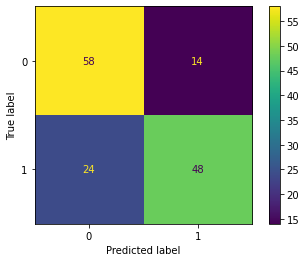

In [160]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr, normalized_X_test, y_test)

In [161]:
# precision: TP/(TP+FP) accuracy of the positive prediction
def precision(cm):
    TP = cm[1,1]
    TPFP = cm[:,1].sum()
    return TP / TPFP

In [162]:
print("Precision ", precision(cm_simple_LassoLogRegr))

Precision  0.7741935483870968


In [163]:
# Recall:  TP/(TP+FN) ratio of positive instances correctly detected by the classifier
def recall(cm):
    TP = cm[1,1]
    T = cm[1,:].sum()
    return TP / T

In [164]:
print("Recall:", recall(cm_simple_LassoLogRegr))

Recall: 0.6666666666666666


In [165]:
# F1 score: 2 * precision_RF * recall_RF / (precision_RF + recall_RF)
def f1(cm):
    p = precision(cm)
    r = recall(cm)
    return (2 * p * r) / (p + r)

In [166]:
print("F1:", f1(cm_simple_LassoLogRegr))

F1: 0.7164179104477612


In [167]:
# MCC (Matthews correlation coefficient)

def mcc(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    
    mcc_value = numerator / denominator
    return mcc_value

In [168]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 1))
tp

48

In [169]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 0))
tn

58

In [170]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 1))
fp

14

In [171]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 0))
fn

24

In [172]:
print("MCC:", mcc(y_test, y_pred_simple_Lasso))

MCC: 0.4768438064352323


In [173]:
feature_names_lista_simple_Lasso = list(feature_names_simple_Lasso)
feature_names_lista_simple_Lasso

['TP53_270_282',
 'PIK3R1_566_578',
 'PIK3CA_102_113',
 'PIK3CA_345_345',
 'PIK3CA_541_542',
 'PIK3CA_545_546',
 'PIK3CA_1046_1047',
 'MAML3_503_503',
 'AKT1_17_17',
 'MYL10_26_26',
 'TP53_191_199',
 'TP53_236_258',
 'TP53_173_177',
 'CTCF_283_288',
 'NOTCH2_2297_2303',
 'TP53_noClust',
 'PIK3CA_noClust',
 'MAML3_noClust',
 'ATP11A_noClust',
 'MMS22L_noClust',
 'KMT2C_noClust',
 'PTEN_noClust',
 'MYH7B_noClust',
 'TULP4_noClust',
 'CACNA1S_noClust',
 'ACTN4_noClust',
 'PUM1_noClust',
 'LARP4B_noClust',
 'SMTNL1_noClust',
 'CTCF_noClust',
 'SVIL_noClust',
 'EPS8L3_noClust',
 'ZNF438_noClust',
 'CALB2_noClust',
 'SOGA2_noClust',
 'TFPI2_noClust',
 'STRN4_noClust',
 'ATRX_noClust',
 'ASXL2_noClust',
 'P2RX2_noClust',
 'ACTG1_noClust',
 'LDLR_noClust',
 'BCL9_noClust',
 'TMEM214_noClust',
 'CREBBP_noClust',
 'CDKN2A_noClust',
 'MUSK_noClust',
 'CYHR1_noClust',
 'GPR119_noClust',
 'ZNF764_noClust',
 'CD33_noClust',
 'DIEXF_noClust',
 'KLF10_noClust',
 'OR4X2_noClust',
 'KIAA1614_noClust',
 

In [174]:
len(feature_names_lista_simple_Lasso)

152

# Ridge Logistic Regression

## Grid search to find the optimal parameter for Ridge regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.103...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best C for Ridge logistic regression:  0.01
Best cross-validation score:  0.6921946003742314


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Ridge Logistic Regression')

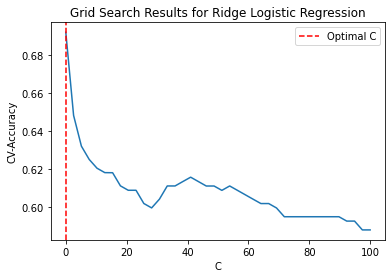

In [175]:
# Create a grid of alpha values for Ridge regularization
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a logistic regression model with Ridge regularization (L2)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best C value
print("Best C for Ridge logistic regression: ", grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]

plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Ridge Logistic Regression')
plt.legend()
plt.show()

Best lambda (alpha) for Ridge logistic regression:100 (C=0.01).

### Compute the classification metrics on the cross-validation results 

In [176]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_ridge_model = grid_search.best_estimator_  # Get the best Ridge model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_Ridge = cross_val_predict(best_ridge_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_R = np.mean(accuracy_scores_R)
std_accuracy_R = np.std(accuracy_scores_R)
mean_precision_1_R = np.mean(precision_scores_1_R)
std_precision_1_R = np.std(precision_scores_1_R)
mean_recall_1_R = np.mean(recall_scores_1_R)
std_recall_1_R = np.std(recall_scores_1_R)
mean_f1_1_R = np.mean(f1_scores_1_R)
std_f1_1_R = np.std(f1_scores_1_R)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_R)
print("Standard Deviation of Accuracy:", std_accuracy_R)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_R)
print("Standard Deviation of Precision - 1:", std_precision_1_R)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_R)
print("Standard Deviation of Recall - 1:", std_recall_1_R)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_R)
print("Standard Deviation of F1-score - 1:", std_f1_1_R)

Mean Cross-Validation Accuracy: 0.6921946003742314
Standard Deviation of Accuracy: 0.03334213169251223
Mean Cross-Validation Precision - 1: 0.6728506149199498
Standard Deviation of Precision - 1: 0.026368133862047383
Mean Cross-Validation Recall - 1: 0.75
Standard Deviation of Recall - 1: 0.10229915092057106
Mean Cross-Validation F1-score - 1: 0.7058610823083971
Standard Deviation of F1-score - 1: 0.049545269193276884


In [177]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_R = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_R)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_R = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_R)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_R = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_R)

# compute the mean and the standard deviation
mean_precision_0_R = np.mean(precision_scores_0_R)
std_precision_0_R = np.std(precision_scores_0_R)
mean_recall_0_R = np.mean(recall_scores_0_R)
std_recall_0_R = np.std(recall_scores_0_R)
mean_f1_0_R = np.mean(f1_scores_0_R)
std_f1_0_R = np.std(f1_scores_0_R)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_R)
print("Standard Deviation of Precision - 0:", std_precision_0_R)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_R)
print("Standard Deviation of Recall - 0:", std_recall_0_R)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_R)
print("Standard Deviation of F1-score: - 0", std_f1_0_R)

Mean Cross-Validation Precision - 0: 0.7289832274373164
Standard Deviation of Precision - 0: 0.07025828721874423
Mean Cross-Validation Recall - 0: 0.634355179704017
Standard Deviation of Recall - 0: 0.06239509206088378
Mean Cross-Validation F1-score: - 0 0.6729188009861989
Standard Deviation of F1-score: - 0 0.0267871439273646


## Ridge on the test set

In [178]:
def Ridge(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
    clf = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=0.01)

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]

    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")
    
    explainer = shap.Explainer(clf, X_train)

    # Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

    # Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))

    return (y_pred, feature_names)

              precision    recall  f1-score   support

           0       0.67      0.89      0.76        72
           1       0.83      0.56      0.67        72

    accuracy                           0.72       144
   macro avg       0.75      0.72      0.71       144
weighted avg       0.75      0.72      0.71       144

Numero di feature con coefficiente diverso da zero: 382
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_270_282', 'PIK3R1_566_578', 'PIK3CA_102_113', 'PIK3CA_345_345',
       'PIK3CA_541_542', 'PIK3CA_545_546', 'PIK3CA_1046_1047', 'MAML3_503_503',
       'ZKSCAN1_270_270', 'MTMR12_520_521',
       ...
       'SERPINB4_noClust', 'LDOC1L_noClust', 'FANK1_noClust', 'G3BP1_noClust',
       'NAGK_noClust', 'FAM153A_noClust', 'SNAP23_noClust', 'PSTPIP2_noClust',
       'LSM2_noClust', 'HCRT_noClust'],
      dtype='object', length=382)


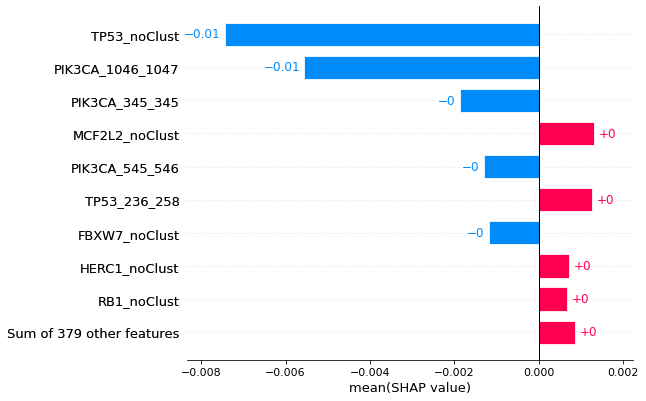

In [179]:
y_pred_simple_Ridge, feature_names_simple_Ridge = Ridge(normalized_X_train, normalized_X_test, y_train, y_test)

### Study of the function Ridge

In [180]:
clf_simple_LogRegr_Ridge = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=0.01)

In [181]:
clf_simple_LogRegr_Ridge.fit(normalized_X_train, y_train)

LogisticRegression(C=0.01, intercept_scaling=10000.0, max_iter=1000000,
                   random_state=123, solver='liblinear', tol=1e-06)

In [182]:
y_pred_simple_Ridge = clf_simple_LogRegr_Ridge.predict(normalized_X_test)

In [183]:
y_pred_simple_Ridge

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [184]:
# Test accuracy 
accuracy_simple_RidgeLogRegr = np.mean(y_test == y_pred_simple_Ridge)
print("Accuracy:", accuracy_simple_RidgeLogRegr)

Accuracy: 0.7222222222222222


In [185]:
cm_simple_RidgeLogRegr = confusion_matrix(y_test, y_pred_simple_Ridge)
print(cm_simple_RidgeLogRegr)

[[64  8]
 [32 40]]


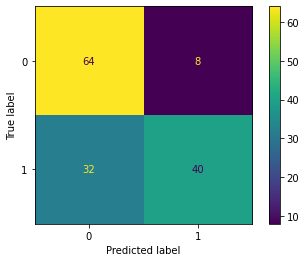

In [186]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr_Ridge, normalized_X_test, y_test)

In [187]:
print("Precision ", precision(cm_simple_RidgeLogRegr))

Precision  0.8333333333333334


In [188]:
print("Recall:", recall(cm_simple_RidgeLogRegr))

Recall: 0.5555555555555556


In [189]:
print("F1:", f1(cm_simple_RidgeLogRegr))

F1: 0.6666666666666667


In [190]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 1))
tp

40

In [191]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 0))
tn

64

In [192]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 1))
fp

8

In [193]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 0))
fn

32

In [194]:
print("MCC:", mcc(y_test, y_pred_simple_Ridge))

MCC: 0.4714045207910316


# Full Logistic Regression

## Cross-validation

In [195]:
# Create a Logistic Regression model without regularization
logreg_model = LogisticRegression(solver="newton-cg", penalty='none')

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.52873563 0.62068966 0.53488372 0.55813953 0.55813953]
Mean CV Accuracy: 0.5601176156107993


In [196]:
## POSITIVE CLASS (1)

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_logreg = cross_val_predict(logreg_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_logreg = np.mean(accuracy_scores_logreg)
std_accuracy_logreg = np.std(accuracy_scores_logreg)
mean_precision_1_logreg = np.mean(precision_scores_1_logreg)
std_precision_1_logreg = np.std(precision_scores_1_logreg)
mean_recall_1_logreg = np.mean(recall_scores_1_logreg)
std_recall_1_logreg = np.std(recall_scores_1_logreg)
mean_f1_1_logreg = np.mean(f1_scores_1_logreg)
std_f1_1_logreg = np.std(f1_scores_1_logreg)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_logreg)
print("Standard Deviation of Accuracy:", std_accuracy_logreg)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_logreg)
print("Standard Deviation of Precision - 1:", std_precision_1_logreg)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_logreg)
print("Standard Deviation of Recall - 1:", std_recall_1_logreg)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_logreg)
print("Standard Deviation of F1-score - 1:", std_f1_1_logreg)

Mean Cross-Validation Accuracy: 0.5601176156107993
Standard Deviation of Accuracy: 0.03255265245086822
Mean Cross-Validation Precision - 1: 0.5753750125843149
Standard Deviation of Precision - 1: 0.050265302439463956
Mean Cross-Validation Recall - 1: 0.48604651162790696
Standard Deviation of Recall - 1: 0.03778622513784166
Mean Cross-Validation F1-score - 1: 0.5247918702364667
Standard Deviation of F1-score - 1: 0.0266726426822577


In [197]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_logreg = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_logreg)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_logreg = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_logreg)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_logreg = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_logreg)

# compute the mean and the standard deviation
mean_precision_0_logreg = np.mean(precision_scores_0_logreg)
std_precision_0_logreg = np.std(precision_scores_0_logreg)
mean_recall_0_logreg = np.mean(recall_scores_0_logreg)
std_recall_0_logreg = np.std(recall_scores_0_logreg)
mean_f1_0_logreg = np.mean(f1_scores_0_logreg)
std_f1_0_logreg = np.std(f1_scores_0_logreg)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_logreg)
print("Standard Deviation of Precision - 0:", std_precision_0_logreg)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_logreg)
print("Standard Deviation of Recall - 0:", std_recall_0_logreg)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_logreg)
print("Standard Deviation of F1-score: - 0", std_f1_0_logreg)

Mean Cross-Validation Precision - 0: 0.5510298538995336
Standard Deviation of Precision - 0: 0.021592246548702492
Mean Cross-Validation Recall - 0: 0.6346723044397462
Standard Deviation of Recall - 0: 0.08132695295012017
Mean Cross-Validation F1-score: - 0 0.5884673422786368
Standard Deviation of F1-score: - 0 0.04661865433588675


## Full Logistic Regression on the test set 

In [198]:
def Full_LogReg(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
         clf_logreg = LogisticRegression(solver="newton-cg", penalty='none') 
# Addestramento del modello sui dati di training 
         clf_logreg.fit(X_train, y_train)  
# Predizione sui dati di test
         y_pred = clf_logreg.predict(X_test)
# Valutazione del modello
         print(classification_report(y_test, y_pred))
    
         return(y_pred)

In [199]:
y_pred_logreg = Full_LogReg(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.60      0.61      0.61        72
           1       0.61      0.60      0.60        72

    accuracy                           0.60       144
   macro avg       0.60      0.60      0.60       144
weighted avg       0.60      0.60      0.60       144



### Study of the full logistic regression function

In [200]:
clf_simple_LogRegr_Full = LogisticRegression(solver="newton-cg", penalty='none')

In [201]:
clf_simple_LogRegr_Full.fit(normalized_X_train, y_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [202]:
y_pred_full_logreg = clf_simple_LogRegr_Full.predict(normalized_X_test)

In [203]:
y_pred_full_logreg

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [204]:
# Test accuracy 
accuracy_full_logreg = np.mean(y_test == y_pred_full_logreg)
print("Accuracy:", accuracy_full_logreg)

Accuracy: 0.6041666666666666


In [205]:
cm_full_logreg = confusion_matrix(y_test, y_pred_full_logreg)
print(cm_full_logreg)

[[44 28]
 [29 43]]


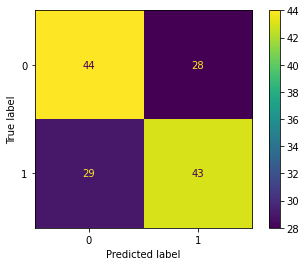

In [206]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr_Full, normalized_X_test, y_test)

In [207]:
print("Precision ", precision(cm_full_logreg))

Precision  0.6056338028169014


In [208]:
print("Recall:", recall(cm_full_logreg))

Recall: 0.5972222222222222


In [209]:
print("F1:", f1(cm_full_logreg))

F1: 0.6013986013986014


In [210]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 1))
tp

43

In [211]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 0))
tn

44

In [212]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 1))
fp

28

In [213]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 0))
fn

29

In [214]:
print("MCC:", mcc(y_test, y_pred_full_logreg))

MCC: 0.20835343011950203


# Support Vector Machine (SVM)

The SVM algorithm finds a robust solution to the linearly separable problem. That is, there exists a hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0}\right)} = \mathbf{w}^{T} \cdot \mathbf{x}+w_{0}=0$, that separates two categories:

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$

Every training point is either above the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} - 1\right)}$ or below the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} + 1\right)}$ . We call them *marginal hyperplanes*. Of course there are infinitely many hyperplanes for which the condition is satisfied, but the **hyperplane with the largest margin** is the one that appears in the Support Vector Machine model. **Margin** is the distance between marginal hyperplanes $M=1 /\|\mathbf{w}\|$.

### Linearly Separable case (hard margins)

Is the solution to the optimization problem:

$\min _{\mathbf{w}, w_{0}}\left\{\frac{1}{2}\|\mathbf{w}\|^{2}\right\}$

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$


## 1) Linear Kernel

## Grid search to find the optimal parameter for Support Vector Machine

Let's tune the regularization parameter C that controls the trade-off between maximizing the margin (separating the data points as well as possible) and minimizing the classification error (allowing some data points to be misclassified). It's often referred to as the "soft margin" parameter because it allows for some level of misclassification within the training data.

- **Small C (Strong Regularization)**: when 'C' is small, the SVM optimization will focus on finding the largest margin even if it results in some training data points being misclassified. In other words, the model is penalized more for misclassifying data points and, as a result, may have a narrower margin. This is useful when there's a lot of noise in the data, and the goal is to have a more robust and generalized model.
- **Large C (Weak Regularization)**: when 'C' is large, the SVM optimization will strive to classify all training data points correctly, even if it means having a smaller margin. In this case, the model is penalized less for misclassification, and it may be more prone to overfitting the training data. This can be useful when the training data is well-behaved and the goal is to maximize the accuracy on the training data.

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315385e+01, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])},
             scoring='accuracy')

Best 'C' for Linear SVM: 7.701538461538462
Best cv accuracy: 0.629671210906175


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Linear Kernel SVM')

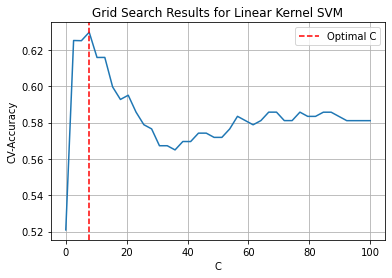

In [215]:
# Define the range of 'C' values to test
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a linear kernel SVM and perform grid search
linear_svm = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy', refit=True)
linear_svm.fit(normalized_X_train, y_train)

# Print the best 'C' value and its corresponding accuracy
best_C = linear_svm.best_params_['C']
best_cv_accuracy = linear_svm.best_score_

print("Best 'C' for Linear SVM:", best_C)
print("Best cv accuracy:", best_cv_accuracy)

# Get the best model (trained with the best 'C' value)
best_linear_svm_model = linear_svm.best_estimator_

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = linear_svm.cv_results_['mean_test_score']

best_C = C_values[np.argmax(accuracy_scores)]
max_accuracy = np.max(accuracy_scores)

# Plot the C values against cross-validation accuracy
plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Linear Kernel SVM')
plt.legend()
plt.grid()
plt.show()

Best C for Linear SVM: 7.7

### Compute the classification metrics on the cross-validation results

In [216]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_linear_svm_model = linear_svm.best_estimator_  # Get the best Linear SVM model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_linear_svm = cross_val_predict(best_linear_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_linear_svm = np.mean(accuracy_scores_linear_svm)
std_accuracy_linear_svm = np.std(accuracy_scores_linear_svm)
mean_precision_1_linear_svm = np.mean(precision_scores_1_linear_svm)
std_precision_1_linear_svm = np.std(precision_scores_1_linear_svm)
mean_recall_1_linear_svm = np.mean(recall_scores_1_linear_svm)
std_recall_1_linear_svm = np.std(recall_scores_1_linear_svm)
mean_f1_1_linear_svm = np.mean(f1_scores_1_linear_svm)
std_f1_1_linear_svm = np.std(f1_scores_1_linear_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_linear_svm)
print("Standard Deviation of Accuracy:", std_accuracy_linear_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_linear_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_linear_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_linear_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_linear_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_linear_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_linear_svm)

Mean Cross-Validation Accuracy: 0.629671210906175
Standard Deviation of Accuracy: 0.04563409100913478
Mean Cross-Validation Precision - 1: 0.6588972770680087
Standard Deviation of Precision - 1: 0.05986950909881902
Mean Cross-Validation Recall - 1: 0.5364693446088795
Standard Deviation of Recall - 1: 0.10374390511824591
Mean Cross-Validation F1-score - 1: 0.5866802801215514
Standard Deviation of F1-score - 1: 0.07708289403220234


In [217]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_linear_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_linear_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_linear_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_linear_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_linear_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_linear_svm)

# compute the mean and the standard deviation
mean_precision_0_linear_svm = np.mean(precision_scores_0_linear_svm)
std_precision_0_linear_svm = np.std(precision_scores_0_linear_svm)
mean_recall_0_linear_svm = np.mean(recall_scores_0_linear_svm)
std_recall_0_linear_svm = np.std(recall_scores_0_linear_svm)
mean_f1_0_linear_svm = np.mean(f1_scores_0_linear_svm)
std_f1_0_linear_svm = np.std(f1_scores_0_linear_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_linear_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_linear_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_linear_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_linear_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_linear_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_linear_svm)

Mean Cross-Validation Precision - 0: 0.6131171702284451
Standard Deviation of Precision - 0: 0.04249477836741974
Mean Cross-Validation Recall - 0: 0.7221987315010571
Standard Deviation of Recall - 0: 0.06416203134511206
Mean Cross-Validation F1-score: - 0 0.6609539332259576
Standard Deviation of F1-score: - 0 0.03450330876302549


# Linear SVM on the test set 

In [218]:
def LinearSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='linear', C=7.7)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [219]:
y_pred_linear_svm = LinearSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        72
           1       0.76      0.62      0.69        72

    accuracy                           0.72       144
   macro avg       0.72      0.72      0.71       144
weighted avg       0.72      0.72      0.71       144



### Study of the Linear SVM function

In [220]:
clf_linear_svm = SVC(kernel='linear', C=7.7)

In [221]:
clf_linear_svm.fit(normalized_X_train, y_train)

SVC(C=7.7, kernel='linear')

In [222]:
y_pred_linear_svm = clf_linear_svm.predict(normalized_X_test)

In [223]:
y_pred_linear_svm

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

## Evaluate the model with classification metrics 

In [224]:
# Test accuracy 
accuracy_linear_svm = np.mean(y_test == y_pred_linear_svm)
print("Accuracy:", accuracy_linear_svm)

Accuracy: 0.7152777777777778


In [225]:
# build the confusion matrix
cm_linear_svm = confusion_matrix(y_test, y_pred_linear_svm)
print(cm_linear_svm)

[[58 14]
 [27 45]]


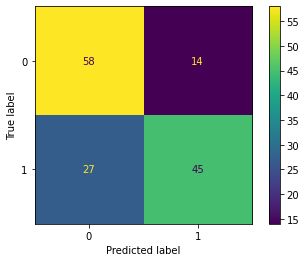

In [226]:
# Plot test confusion matrix
plot_confusion_matrix(clf_linear_svm, normalized_X_test, y_test)

In [227]:
print("Precision ", precision(cm_linear_svm))

Precision  0.7627118644067796


In [228]:
print("Recall:", recall(cm_linear_svm))

Recall: 0.625


In [229]:
print("F1:", f1(cm_linear_svm))

F1: 0.6870229007633587


In [230]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 1))
tp

45

In [231]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 0))
tn

58

In [232]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 1))
fp

14

In [233]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 0))
fn

27

In [234]:
print("MCC:", mcc(y_test, y_pred_linear_svm))

MCC: 0.4377500709607271


# SVM - Polynomial Kernel

## Grid search to find the optimal parameters for SVM polynomial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **coef0**: coefficient of the polynomial kernel function
- **degree**: it specifies the degree of the polynomial kernel function

In [235]:
# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4]}

# Create a polynomial kernel and perform grid search
poly_svm = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=5, scoring='accuracy', refit=True)
poly_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_poly = poly_svm.best_params_['C']
best_degree_poly = poly_svm.best_params_['degree']
best_coef0_poly = poly_svm.best_params_['coef0']
best_cv_accuracy_poly = poly_svm.best_score_

print("Best 'C' for Polynomial SVM:", best_C_poly)
print("Best degree:", best_degree_poly)
print("Best coef0:", best_coef0_poly)
print("Best cv accuracy:", best_cv_accuracy_poly)

# Get the best model (trained with the best hyperparameters)
best_poly_svm_model = poly_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'coef0': array([-10.,  -5.,   0.,   5.,  10.]),
                         'degree': [2, 3, 4]},
             scoring='accuracy')

Best 'C' for Polynomial SVM: 0.001
Best degree: 4
Best coef0: 5.0
Best cv accuracy: 0.6920876770916866


### Compute the classification metrics on the cross-validation results

In [236]:
# POSITIVE CLASS (1)


# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_poly_svm = cross_val_predict(best_poly_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_poly_svm = np.mean(accuracy_scores_poly_svm)
std_accuracy_poly_svm = np.std(accuracy_scores_poly_svm)
mean_precision_1_poly_svm = np.mean(precision_scores_1_poly_svm)
std_precision_1_poly_svm = np.std(precision_scores_1_poly_svm)
mean_recall_1_poly_svm = np.mean(recall_scores_1_poly_svm)
std_recall_1_poly_svm = np.std(recall_scores_1_poly_svm)
mean_f1_1_poly_svm = np.mean(f1_scores_1_poly_svm)
std_f1_1_poly_svm = np.std(f1_scores_1_poly_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_poly_svm)
print("Standard Deviation of Accuracy:", std_accuracy_poly_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_poly_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_poly_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_poly_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_poly_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_poly_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_poly_svm)

Mean Cross-Validation Accuracy: 0.6920876770916866
Standard Deviation of Accuracy: 0.04201940464643727
Mean Cross-Validation Precision - 1: 0.7590076218575205
Standard Deviation of Precision - 1: 0.041389362641576395
Mean Cross-Validation Recall - 1: 0.5734672304439747
Standard Deviation of Recall - 1: 0.1442838167398859
Mean Cross-Validation F1-score - 1: 0.6396429366751584
Standard Deviation of F1-score - 1: 0.09383854946316579


In [237]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_poly_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_poly_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_poly_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_poly_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_poly_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_poly_svm)

# compute the mean and the standard deviation
mean_precision_0_poly_svm = np.mean(precision_scores_0_poly_svm)
std_precision_0_poly_svm = np.std(precision_scores_0_poly_svm)
mean_recall_0_poly_svm = np.mean(recall_scores_0_poly_svm)
std_recall_0_poly_svm = np.std(recall_scores_0_poly_svm)
mean_f1_0_poly_svm = np.mean(f1_scores_0_poly_svm)
std_f1_0_poly_svm = np.std(f1_scores_0_poly_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_poly_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_poly_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_poly_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_poly_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_poly_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_poly_svm)

Mean Cross-Validation Precision - 0: 0.6648541193101204
Standard Deviation of Precision - 0: 0.057852397491673424
Mean Cross-Validation Recall - 0: 0.8101479915433405
Standard Deviation of Recall - 0: 0.06811942996810816
Mean Cross-Validation F1-score: - 0 0.7254719735215092
Standard Deviation of F1-score: - 0 0.01685599183277772


## Polynomial SVM on the test set 

In [238]:
def PolySVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='poly', C=0.001, degree=4, coef0=5)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [239]:
y_pred_poly_svm = PolySVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.68      0.90      0.77        72
           1       0.85      0.57      0.68        72

    accuracy                           0.74       144
   macro avg       0.77      0.74      0.73       144
weighted avg       0.77      0.74      0.73       144



### Study of the Polynomial SVM function

In [240]:
clf_poly_svm = SVC(kernel='poly', C=0.001, degree=4, coef0=5)

In [241]:
clf_poly_svm.fit(normalized_X_train, y_train)

SVC(C=0.001, coef0=5, degree=4, kernel='poly')

In [242]:
y_pred_poly_svm = clf_poly_svm.predict(normalized_X_test)

In [243]:
y_pred_poly_svm

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [244]:
# Test accuracy 
accuracy_poly_svm = np.mean(y_test == y_pred_poly_svm)
print("Accuracy:", accuracy_poly_svm)

Accuracy: 0.7361111111111112


In [245]:
# build the confusion matrix
cm_poly_svm = confusion_matrix(y_test, y_pred_poly_svm)
print(cm_poly_svm)

[[65  7]
 [31 41]]


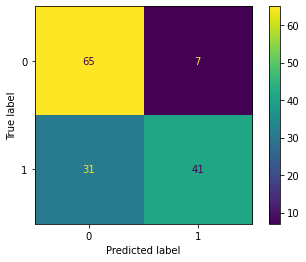

In [246]:
# Plot test confusion matrix
plot_confusion_matrix(clf_poly_svm, normalized_X_test, y_test)

In [247]:
print("Precision ", precision(cm_poly_svm))

Precision  0.8541666666666666


In [248]:
print("Recall:", recall(cm_poly_svm))

Recall: 0.5694444444444444


In [249]:
print("F1:", f1(cm_poly_svm))

F1: 0.6833333333333332


In [250]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 1))
tp

41

In [251]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 0))
tn

65

In [252]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 1))
fp

7

In [253]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 0))
fn

31

In [254]:
print("MCC:", mcc(y_test, y_pred_poly_svm))

MCC: 0.5008673033404711


# SMV - Radial Kernel

## Grid search to find the optimal parameters for SVM radial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **Gamma**: kernel coefficient that controls the flexibility of the SVM's decision boundary: 

        1. Small Gamma (e.g., 0.01): The decision boundary is smoother and broader. It considers more data points and is less likely to overfit.
        2. Large Gamma (e.g., 10): The decision boundary is more flexible, curving closely to individual data points. It's more likely to overfit.

In [255]:
# RBF (Radial Basis Function) kernel
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}

# Create an RBF kernel SVM and perform grid search
rbf_svm = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=5, scoring='accuracy', refit=True)
rbf_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_rbf = rbf_svm.best_params_['C']
best_gamma_rbf = rbf_svm.best_params_['gamma']
best_cv_accuracy_rbf = rbf_svm.best_score_

print("Best 'C' for RBF SVM:", best_C_rbf)
print("Best gamma:", best_gamma_rbf)
print("Best cv accuracy:", best_cv_accuracy_rbf)

# Get the best model (trained with the best hyperparameters)
best_rbf_svm_model = rbf_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='accuracy')

Best 'C' for RBF SVM: 25.00075
Best gamma: 0.001
Best cv accuracy: 0.710772520716386


### Compute the classification metrics on the cross-validation results

In [256]:
# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_radial_svm = cross_val_predict(best_rbf_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_radial_svm = np.mean(accuracy_scores_radial_svm)
std_accuracy_radial_svm = np.std(accuracy_scores_radial_svm)
mean_precision_1_radial_svm = np.mean(precision_scores_1_radial_svm)
std_precision_1_radial_svm = np.std(precision_scores_1_radial_svm)
mean_recall_1_radial_svm = np.mean(recall_scores_1_radial_svm)
std_recall_1_radial_svm = np.std(recall_scores_1_radial_svm)
mean_f1_1_radial_svm = np.mean(f1_scores_1_radial_svm)
std_f1_1_radial_svm = np.std(f1_scores_1_radial_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_radial_svm)
print("Standard Deviation of Accuracy:", std_accuracy_radial_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_radial_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_radial_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_radial_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_radial_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_radial_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_radial_svm)

Mean Cross-Validation Accuracy: 0.710772520716386
Standard Deviation of Accuracy: 0.04545277174479748
Mean Cross-Validation Precision - 1: 0.7554997153632677
Standard Deviation of Precision - 1: 0.04459227834046714
Mean Cross-Validation Recall - 1: 0.6293868921775898
Standard Deviation of Recall - 1: 0.13454396625017498
Mean Cross-Validation F1-score - 1: 0.677239010312181
Standard Deviation of F1-score - 1: 0.08117774260585842


In [257]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_radial_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_radial_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_radial_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_radial_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_radial_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_radial_svm)

# compute the mean and the standard deviation
mean_precision_0_radial_svm = np.mean(precision_scores_0_radial_svm)
std_precision_0_radial_svm = np.std(precision_scores_0_radial_svm)
mean_recall_0_radial_svm = np.mean(recall_scores_0_radial_svm)
std_recall_0_radial_svm = np.std(recall_scores_0_radial_svm)
mean_f1_0_radial_svm = np.mean(f1_scores_0_radial_svm)
std_f1_0_radial_svm = np.std(f1_scores_0_radial_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_radial_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_radial_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_radial_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_radial_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_radial_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_radial_svm)

Mean Cross-Validation Precision - 0: 0.6915266293989698
Standard Deviation of Precision - 0: 0.0669947107997118
Mean Cross-Validation Recall - 0: 0.7917547568710359
Standard Deviation of Recall - 0: 0.062042725782747304
Mean Cross-Validation F1-score: - 0 0.7335408386673918
Standard Deviation of F1-score: - 0 0.025207594740406767


### Radial SVM on the test set 

In [258]:
def RadialSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='rbf', C=25, gamma=0.001)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [259]:
y_pred_radial_svm = RadialSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.67      0.86      0.75        72
           1       0.80      0.57      0.67        72

    accuracy                           0.72       144
   macro avg       0.74      0.72      0.71       144
weighted avg       0.74      0.72      0.71       144



### Study of the Radial SVM function

In [260]:
clf_radial_svm = SVC(kernel='rbf', C=25, gamma=0.001)

In [261]:
clf_radial_svm.fit(normalized_X_train, y_train)

SVC(C=25, gamma=0.001)

In [262]:
y_pred_radial_svm = clf_radial_svm.predict(normalized_X_test)

In [263]:
y_pred_radial_svm

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [264]:
# Test accuracy 
accuracy_radial_svm = np.mean(y_test == y_pred_radial_svm)
print("Accuracy:", accuracy_radial_svm)

Accuracy: 0.7152777777777778


In [265]:
# build the confusion matrix
cm_radial_svm = confusion_matrix(y_test, y_pred_radial_svm)
print(cm_radial_svm)

[[62 10]
 [31 41]]


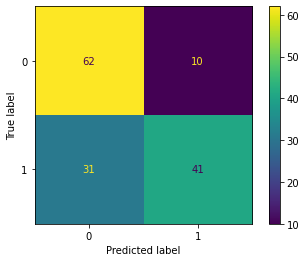

In [266]:
# Plot test confusion matrix
plot_confusion_matrix(clf_radial_svm, normalized_X_test, y_test)

In [267]:
print("Precision ", precision(cm_radial_svm))

Precision  0.803921568627451


In [268]:
print("Recall:", recall(cm_radial_svm))

Recall: 0.5694444444444444


In [269]:
print("F1:", f1(cm_radial_svm))

F1: 0.6666666666666666


In [270]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 1))
tp

41

In [271]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 0))
tn

62

In [272]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 1))
fp

10

In [273]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 0))
fn

31

In [274]:
print("MCC:", mcc(y_test, y_pred_radial_svm))

MCC: 0.45012706993133317


# Random Forest

## Grid search to find the optimal parameters for Random Forest 

Perform a GridSearch for the mtry parameter of Random Forest.
The GridSearchCV will automatically perform cross-validation, evaluate the performance of the Random Forest with different 'max_features' values, and return the best parameter value based on the chosen scoring metric.

**NOTE 1:** the 'max_features' parameter determines the number of features randomly selected at each split point when building a tree in a random forest: a smaller 'max_features' value leads to more randomness and diversity among the trees, while a larger 'max_features' value reduces the randomness and increases the correlation between the trees.

**NOTE 2:** the Out-Of-Bag (OOB) score is a measure of a model's accuracy. It is calculated based on out-of-bag samples, which are the data points that were not used during training for each tree in the Random Forest. These out-of-bag samples are used to estimate the model's accuracy without the need for a separate validation set. The OOB score is a valuable metric because it provides an estimate of how well the Random Forest model is likely to perform on unseen data.

In [275]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=123, oob_score=True)

# Define the grid of parameters to search over, including max_features and n_estimators
param_grid = {
    'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40, 45, 50],
    'n_estimators': [100, 200, 300, 400]  # Specify the values of n_estimators to try
}

# Create an instance of GridSearchCV and pass the Random Forest classifier, parameter grid, and desired number of cross-validation folds
grid_search_random_forest = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the Grid search object to your data
grid_search_random_forest.fit(normalized_X_train, y_train)

print("Best parameters:", grid_search_random_forest.best_params_)
print("Best cross-validation score (accuracy):", grid_search_random_forest.best_score_)
print("OOB score of best model:", grid_search_random_forest.best_estimator_.oob_score_)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=123),
             param_grid={'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40,
                                          45, 50],
                         'n_estimators': [100, 200, 300, 400]})

Best parameters: {'max_features': 15, 'n_estimators': 100}
Best cross-validation score (accuracy): 0.6461106655974339
OOB score of best model: 0.6226851851851852


### Compute the classification metrics on the cross-validation results 

In [276]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_rf_model = grid_search_random_forest.best_estimator_  # Get the best Random Forest model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_rf = cross_val_predict(best_rf_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_rf = np.mean(accuracy_scores_rf)
std_accuracy_rf = np.std(accuracy_scores_rf)
mean_precision_1_rf = np.mean(precision_scores_1_rf)
std_precision_1_rf = np.std(precision_scores_1_rf)
mean_recall_1_rf = np.mean(recall_scores_1_rf)
std_recall_1_rf = np.std(recall_scores_1_rf)
mean_f1_1_rf = np.mean(f1_scores_1_rf)
std_f1_1_rf = np.std(f1_scores_1_rf)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_rf)
print("Standard Deviation of Accuracy:", std_accuracy_rf)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_rf)
print("Standard Deviation of Precision - 1:", std_precision_1_rf)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_rf)
print("Standard Deviation of Recall - 1:", std_recall_1_rf)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_rf)
print("Standard Deviation of F1-score - 1:", std_f1_1_rf)

Mean Cross-Validation Accuracy: 0.6461106655974339
Standard Deviation of Accuracy: 0.06013688509957126
Mean Cross-Validation Precision - 1: 0.7184764510851467
Standard Deviation of Precision - 1: 0.07537854607419137
Mean Cross-Validation Recall - 1: 0.4677589852008457
Standard Deviation of Recall - 1: 0.12479752652747203
Mean Cross-Validation F1-score - 1: 0.5609501457902524
Standard Deviation of F1-score - 1: 0.10915356926461621


In [277]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_rf = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_rf)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_rf = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_rf)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_rf = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_rf)

# compute the mean and the standard deviation
mean_precision_0_rf = np.mean(precision_scores_0_rf)
std_precision_0_rf = np.std(precision_scores_0_rf)
mean_recall_0_rf = np.mean(recall_scores_0_rf)
std_recall_0_rf = np.std(recall_scores_0_rf)
mean_f1_0_rf = np.mean(f1_scores_0_rf)
std_f1_0_rf = np.std(f1_scores_0_rf)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_rf)
print("Standard Deviation of Precision - 0:", std_precision_0_rf)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_rf)
print("Standard Deviation of Recall - 0:", std_recall_0_rf)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_rf)
print("Standard Deviation of F1-score: - 0", std_f1_0_rf)

Mean Cross-Validation Precision - 0: 0.6128037852788858
Standard Deviation of Precision - 0: 0.05327332298099546
Mean Cross-Validation Recall - 0: 0.8242071881606765
Standard Deviation of Recall - 0: 0.03395785859363518
Mean Cross-Validation F1-score: - 0 0.7012003846224784
Standard Deviation of F1-score: - 0 0.0352504575768689


In [278]:
def RF(X_train, X_test, y_train, y_test):
    
    clf = RandomForestClassifier(max_features=15, n_estimators=100, random_state=123) # The default value for max_features in scikit-learn's RandomForestClassifier is "auto", which means that the number of features considered for splitting at each tree node is equal to the square root of the total number of features.

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [279]:
y_pred_rf = RF(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.65      0.89      0.75        72
           1       0.83      0.53      0.64        72

    accuracy                           0.71       144
   macro avg       0.74      0.71      0.70       144
weighted avg       0.74      0.71      0.70       144



### Study the Random Forest function

In [280]:
clf_rf = RandomForestClassifier(max_features=15, n_estimators=100, random_state=123)

In [281]:
clf_rf.fit(normalized_X_train, y_train)

RandomForestClassifier(max_features=15, random_state=123)

In [282]:
y_pred_rf = clf_rf.predict(normalized_X_test)

In [283]:
y_pred_rf

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

## Evaluate the model with classification metrics 

In [284]:
# Test accuracy 
accuracy_rf = np.mean(y_test == y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.7083333333333334


In [285]:
# build the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[64  8]
 [34 38]]


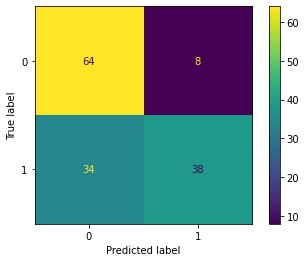

In [286]:
# Plot test confusion matrix
plot_confusion_matrix(clf_rf, normalized_X_test, y_test)

In [287]:
print("Precision ", precision(cm_rf))

Precision  0.8260869565217391


In [288]:
print("Recall:", recall(cm_rf))

Recall: 0.5277777777777778


In [289]:
print("F1:", f1(cm_rf))

F1: 0.6440677966101694


In [290]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_rf == 1))
tp

38

In [291]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_rf == 0))
tn

64

In [292]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_rf == 1))
fp

8

In [293]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_rf == 0))
fn

34

In [294]:
print("MCC:", mcc(y_test, y_pred_rf))

MCC: 0.4468166015508745


# Extreme Gradient Boosting (XGBoost)

## Grid search to find the optimal parameters for XGBoost

### Boosting
In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

In contrast to bagging techniques like Random Forest, in which trees are grown to their maximum extent, boosting makes use of trees with fewer splits. Such small trees, which are not very deep, are highly interpretable. Parameters like the number of trees or iterations, the rate at which the gradient boosting learns, and the depth of the tree, could be optimally selected through validation techniques like k-fold cross validation. Having a large number of trees might lead to overfitting. So, it is necessary to carefully choose the stopping criteria for boosting.

XGBoost offers a wide range of **hyperparameters** that you can fine-tune to optimize the model's performance. Here are some of the most commonly tuned hyperparameters in XGBoost:

1. **Learning Rate (eta)**:
    - Parameter name: eta
    - Description: Learning rate controls the step size at each iteration          while moving toward a minimum of a loss function. Lower values make the      optimization more robust but require more boosting rounds
    
    
2. **Maximum Depth of Trees (max_depth):**
    - Parameter name: max_depth
    - Description: It specifies the maximum depth of the individual trees. Deeper trees can model more complex relationships but are more prone to overfitting.
    
    
3. **Number of Trees (n_estimators):**
    - Parameter name: n_estimators
    - Description: It determines the number of boosting rounds (trees) to train. More rounds can improve performance, but you should be cautious of overfitting.
    
    
4. **Column Subsampling (colsample_bytree and colsample_bylevel):**
    - Parameter name: colsample_bytree and colsample_bylevel
    - Description: These parameters control the fraction of features (columns) to be randomly sampled for building each tree and each level of a tree, respectively.
    
    
5. **Regularization Parameter (gamma):**
    - Parameter names: gamma
    - Description: used for controlling regularization. The gamma hyperparameter is related to the minimum loss reduction required to make a further partition on a leaf node of the tree. (default value = 0 --> no regularization is applied and the tree can grow as deep as necessary to fit the training data)

In [295]:
import xgboost as xgb

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 6, 8, 9],
    'n_estimators': [100, 200, 300],
    #'colsample_bytree': [0.5, 0.75, 1.0],
    #'gamma': [0, 0.1, 0.2] 
}

# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic')

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_learning_rate = grid_search_xgb.best_params_['learning_rate']
best_max_depth = grid_search_xgb.best_params_['max_depth']
best_n_estimators = grid_search_xgb.best_params_['n_estimators']
#best_colsample_bytree = grid_search_xgb.best_params_['colsample_bytree']

best_accuracy = grid_search_xgb.best_score_

print("Best Learning Rate:", best_learning_rate)
print("Best Max Depth:", best_max_depth)
print("Best Number of Trees:", best_n_estimators)
#print("Best Column Subsampling:", best_colsample_bytree)
print("Best Accuracy:", best_accuracy)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

Best Learning Rate: 0.1
Best Max Depth: 5
Best Number of Trees: 300
Best Accuracy: 0.726944667201283


### Compute the classification metrics on the cross-validation results 

In [296]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_xgb_model = grid_search_xgb.best_estimator_  # Get the best xgb model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_xgb = cross_val_predict(best_xgb_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_xgb = np.mean(accuracy_scores_xgb)
std_accuracy_xgb = np.std(accuracy_scores_xgb)
mean_precision_1_xgb = np.mean(precision_scores_1_xgb)
std_precision_1_xgb = np.std(precision_scores_1_xgb)
mean_recall_1_xgb = np.mean(recall_scores_1_xgb)
std_recall_1_xgb = np.std(recall_scores_1_xgb)
mean_f1_1_xgb = np.mean(f1_scores_1_xgb)
std_f1_1_xgb = np.std(f1_scores_1_xgb)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_xgb)
print("Standard Deviation of Accuracy:", std_accuracy_xgb)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_xgb)
print("Standard Deviation of Precision - 1:", std_precision_1_xgb)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_xgb)
print("Standard Deviation of Recall - 1:", std_recall_1_xgb)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_xgb)
print("Standard Deviation of F1-score - 1:", std_f1_1_xgb)

Mean Cross-Validation Accuracy: 0.726944667201283
Standard Deviation of Accuracy: 0.04355417905016705
Mean Cross-Validation Precision - 1: 0.7287317048031333
Standard Deviation of Precision - 1: 0.032982734889992364
Mean Cross-Validation Recall - 1: 0.7217758985200846
Standard Deviation of Recall - 1: 0.10579784785968048
Mean Cross-Validation F1-score - 1: 0.7216385337301316
Standard Deviation of F1-score - 1: 0.06221778692174467


In [297]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_xgb = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_xgb)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_xgb = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_xgb)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_xgb = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_xgb)

# compute the mean and the standard deviation
mean_precision_0_xgb = np.mean(precision_scores_0_xgb)
std_precision_0_xgb = np.std(precision_scores_0_xgb)
mean_recall_0_xgb = np.mean(recall_scores_0_xgb)
std_recall_0_xgb = np.std(recall_scores_0_xgb)
mean_f1_0_xgb = np.mean(f1_scores_0_xgb)
std_f1_0_xgb = np.std(f1_scores_0_xgb)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_xgb)
print("Standard Deviation of Precision - 0:", std_precision_0_xgb)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_xgb)
print("Standard Deviation of Recall - 0:", std_recall_0_xgb)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_xgb)
print("Standard Deviation of F1-score: - 0", std_f1_0_xgb)

Mean Cross-Validation Precision - 0: 0.7331291730246001
Standard Deviation of Precision - 0: 0.06558298260675594
Mean Cross-Validation Recall - 0: 0.7316067653276955
Standard Deviation of Recall - 0: 0.04466395405866786
Mean Cross-Validation F1-score: - 0 0.7292931907062343
Standard Deviation of F1-score: - 0 0.029639784395121035


In [298]:
def XGBoost(X_train, X_test, y_train, y_test):
    
    clf = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.1, n_estimators=300, max_depth=5, random_state=123) 

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [299]:
y_pred_xgb = XGBoost(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        72
           1       0.82      0.76      0.79        72

    accuracy                           0.80       144
   macro avg       0.80      0.80      0.80       144
weighted avg       0.80      0.80      0.80       144



### Study the eXtreme Gradient Boosting function

In [300]:
clf_xgb = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.1, n_estimators=300, max_depth=5, random_state=123) 

In [301]:
clf_xgb.fit(normalized_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [302]:
y_pred_xgb = clf_xgb.predict(normalized_X_test)

## Evaluate the model with classification metrics 

In [303]:
# Test accuracy 
accuracy_xgb = np.mean(y_test == y_pred_xgb)
print("Accuracy:", accuracy_xgb)

Accuracy: 0.7986111111111112


In [304]:
# build the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

[[60 12]
 [17 55]]


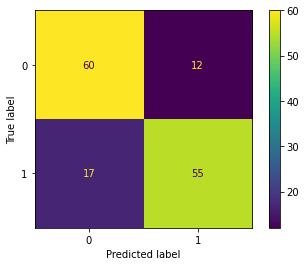

In [305]:
# Plot test confusion matrix
plot_confusion_matrix(clf_xgb, normalized_X_test, y_test)

In [306]:
print("Precision ", precision(cm_xgb))

Precision  0.8208955223880597


In [307]:
print("Recall:", recall(cm_xgb))

Recall: 0.7638888888888888


In [308]:
print("F1:", f1(cm_xgb))

F1: 0.7913669064748201


In [309]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 1))
tp

55

In [310]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 0))
tn

60

In [311]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 1))
fp

12

In [312]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 0))
fn

17

In [313]:
print("MCC:", mcc(y_test, y_pred_xgb))

MCC: 0.5986675130977228
